In [8]:
#linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [10]:
df=pd.read_csv('cse5.csv')
df.head(1000)

,Consumer Demand,Past Produced quantity,Rating,Price,Dicount,Production Rate
0,442,366,2,424,49,60.276
1,339,367,2,397,5,52.097
2,681,95,3,424,45,57.807
3,156,64,2,210,45,22.118
4,862,437,4,376,31,80.650
...,...,...,...,...,...,...
995,603,232,1,337,39,56.767
996,492,238,2,254,14,46.996
997,770,260,5,392,9,67.128
998,493,260,5,340,27,52.721


Predicted value (LR): 32.267084187175364
R2 Score: 0.7128396430838744
Mean Squared Error: 61.34887644550325
Mean Absolute Error: 6.459010595928285
Accuracy (LR):  74.71663093266179


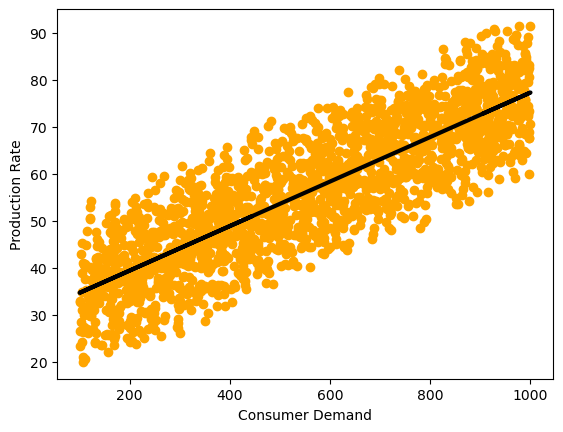

In [11]:
mdl = LinearRegression()
xl= df[['Consumer Demand']].values
yl = df['Production Rate'].values
mdl.fit(xl,yl)
pred = mdl.predict([[50]])
print("Predicted value (LR):", pred[0])

# Calculate R2 score
r2 = mdl.score(xl, yl)
print("R2 Score:", r2)

# Calculate mean squared error
mse = mean_squared_error(yl, mdl.predict(xl))
print("Mean Squared Error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(yl, mdl.predict(xl))
print("Mean Absolute Error:", mae)
print("Accuracy (LR): ",mdl.score(xl[:100], yl[:100])*100)
plt.scatter(xl,yl, color='orange',label='x-axis')
plt.plot(xl, mdl.predict(xl),color='black',linewidth=3)
plt.xlabel('Consumer Demand')  
plt.ylabel('Production Rate') 
plt.show()

In [12]:
#multiplelinear regression

Predicted value (LR):  28.686258524640635
Accuracy (LR):  75.26322583084698


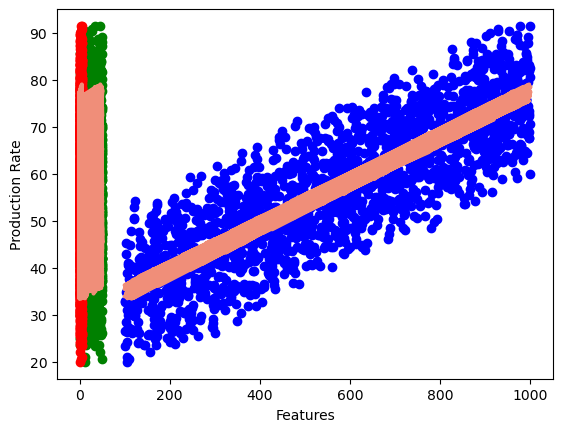

In [15]:
xm= df[['Consumer Demand','Dicount','Rating']].values
ym = df['Production Rate'].values
mdm = LinearRegression()
mdm.fit(xm,ym)
predm = mdm.predict([[1,2,3]])
print("Predicted value (LR): ",predm[0])
print("Accuracy (LR): ",mdm.score(xm[:100], ym[:100])*100)

plt.scatter(df['Consumer Demand'], ym, color='b', label='Consumer Demand')
plt.scatter(df['Dicount'], ym, color='g', label='Dicount')
plt.scatter(df['Rating'], ym, color='r', label='Rating')
plt.plot(xm, mdm.predict(xm),color='#F08E79',linewidth=3)
plt.xlabel('Features')  
plt.ylabel('Production Rate') 
plt.show()

Predicted value: 290.23
R2 Score: 0.8436491208257177
Mean Squared Error: 1214.9185027500002
Mean Absolute Error: 28.485625
Accuracy (LR):  62.055502441673724


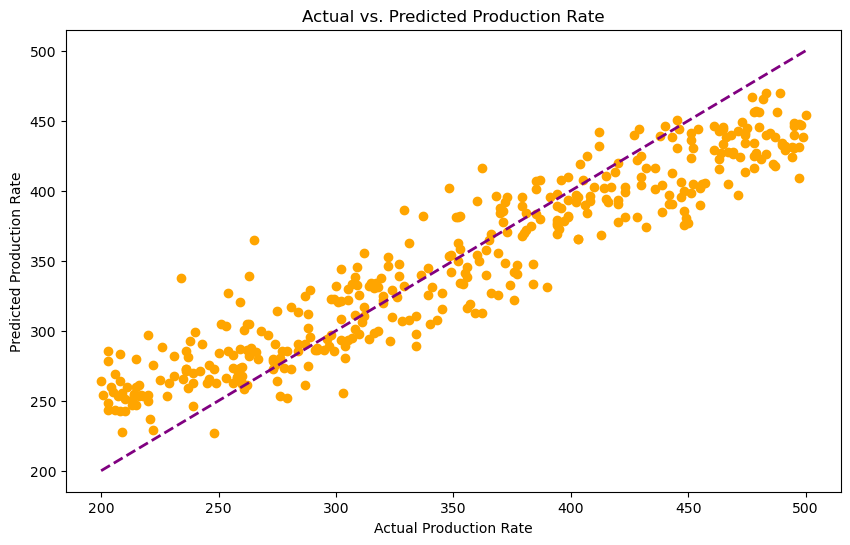

In [16]:
#Randomforest
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv('cse5.csv')

X1 = data.drop("Price", axis=1)
y1 = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate predicted value (for a single test sample)
sample_test = X_test.iloc[[0]]  # Select the first test sample
predicted_value = model.predict(sample_test)
print("Predicted value:", predicted_value[0])
mdl = RandomForestRegressor(n_estimators=100,max_depth=6)
mdl.fit(X1,y1)
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Accuracy (LR): ",mdl.score(X1[:100], y1[:100])*100)

# Scatter plot and visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='purple', linewidth=2)
plt.xlabel('Actual Production Rate')
plt.ylabel('Predicted Production Rate')
plt.title('Actual vs. Predicted Production Rate')
plt.show()